
# Project: Investigate a Dataset - Football Betting Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> I am in the process of learning Python/SQL via Udacity and the following was one of my project pieces.

> The dataset I will be investigating will be ‘Soccer Database’ (original source on Kaggle). I am using this dataset because I have an interest in football and I am a lifelong Arsenal fan, and also because I was interested in improving the SQL skills that I have learnt whilst taking part in this course.

> My first steps were to download the data and also ‘DB Browser for SQL Lite’, which enabled me to view the data.
After taking a look at the database and getting to grips with the program I decided I wanted to look at betting trends in football. I personally do not bet on football but it is interesting to see how bookmakers may price their odds and if there are any trends. 

> The goal for the analysis we are about to perform is to answer two questions:
- Do certain bookmakers give better odds than others consistently?
- Are there certain teams that may defy bookmakers consistently?

> I believe that answering these questions will give us some insight into the betting activities over the period chosen and it will help us understand which football teams outperformed their expectations.  


I used the following SQL to query the database:

SELECT m.season, m.home_team_goal, m.away_team_goal,m.B365H, m.B365D, m.B365A, m.BWH, m.BWD, m.BWA, m.IWH, m.IWD, m.IWA, m.LBH, m.LBD, m.LBA,
m.WHH, m.WHD, m.WHA, m.VCH, m.VCD, m.VCA, c.name country_name, l.name league_name, t1.team_long_name home_team, t2.team_long_name away_team
FROM match m
/* to get the country name instead of ID*/
JOIN country c
ON c.id = m.country_id
/* to get the home team name, use T1 so that we can use this table again for away teams*/
JOIN team t1
ON m.home_team_api_id = t1.team_api_id
/* to get the away team name, use T2 as we have joined the table already for the home team*/
JOIN team t2
ON m.away_team_api_id = t2.team_api_id
/* to get the league names instead of ID*/
JOIN league l
ON l.country_id = m.league_id
/* filtering so that we only see leagues in England or Spain as I see these are the biggest leagues in European football */
WHERE l.id = '1729' AND m.season = '2015/2016' OR l.id ='21518' AND m.season = '2015/2016';


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> As I have mentioned in my project submission document, I tried to clean the data as much as possible using SQL and so I expect the data that I have to be relevatively clean. I will of course perform some inital analysis to ensure that is is ready for further investigation.

### General Properties

In [43]:
df = pd.read_csv('soccer_database_csv.csv')
# looking at the data to make sure it is clear and agrees with what I pulled from the SQL database
df.head()

,country_name,league_name,season,home_team_goal,away_team_goal,Bet365_Home,Bet365_Draw,Bet365_Away,Ladbrokes_Home,Ladbrokes_Draw,Ladbrokes_Away,WilliamHill_Home,WilliamHill_Draw,WilliamHill_Away,home_team,away_team
0,England,England Premier League,2015/2016,0,2,1.29,6.0,12.00,1.29,5.5,12.0,1.30,5.0,11.0,Arsenal,West Ham United
1,England,England Premier League,2015/2016,0,1,2.00,3.6,4.00,2.05,3.3,4.0,1.91,3.5,4.0,Bournemouth,Aston Villa
2,England,England Premier League,2015/2016,2,2,1.36,5.0,11.00,1.40,4.5,10.0,1.40,4.0,10.0,Chelsea,Swansea City
3,England,England Premier League,2015/2016,2,2,1.70,3.9,5.50,1.75,3.8,5.0,1.73,3.5,5.0,Everton,Watford
4,England,England Premier League,2015/2016,4,2,1.95,3.5,4.33,2.00,3.4,4.2,2.00,3.1,2.7,Leicester City,Sunderland


In [44]:
df.describe() #getting an idea as to what the data looks like to see if we can make any predictions

,home_team_goal,away_team_goal,Bet365_Home,Bet365_Draw,Bet365_Away,Ladbrokes_Home,Ladbrokes_Draw,Ladbrokes_Away,WilliamHill_Home,WilliamHill_Draw,WilliamHill_Away
count,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000
mean,1.555263,1.167105,2.785921,4.179961,5.027408,2.704000,4.051342,5.017447,2.758461,3.826645,4.940908
std,1.358950,1.147706,2.271973,1.803000,4.714756,2.074897,1.751469,5.292513,2.128664,1.511267,4.901914
min,0.000000,0.000000,1.040000,3.000000,1.080000,1.050000,2.900000,1.100000,1.020000,2.800000,1.080000
25%,1.000000,0.000000,1.670000,3.375000,2.537500,1.670000,3.300000,2.500000,1.670000,3.100000,2.575000
50%,1.000000,1.000000,2.150000,3.600000,3.550000,2.100000,3.500000,3.500000,2.150000,3.300000,3.400000
75%,2.000000,2.000000,2.900000,4.200000,5.500000,2.900000,4.000000,5.500000,2.885000,3.800000,5.500000
max,10.000000,8.000000,26.000000,17.000000,41.000000,23.000000,19.000000,51.000000,21.000000,17.000000,41.000000


In this phase we are looking at the data to see if it needs further cleaning. WIth the above feature we are looking to see if there are any extreme results that do not look to follow similiar columns. For example if the average odds for different bookmakers were vastly different this would raise some questions, as odds are typically similiar due to the fact there are only thee outcomes.

We can immediately see from this descriptive data that the Home side tends to have lower odds than the Away side. We can also see that at least one match has seen 10 home goals in it, and another has 8 away goals - impressive.

In [45]:
df.shape #getting an idea as to how much data we are working with

(760, 16)

In [46]:
df.info() #checking we dont have any missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 16 columns):
country_name        760 non-null object
league_name         760 non-null object
season              760 non-null object
home_team_goal      760 non-null int64
away_team_goal      760 non-null int64
Bet365_Home         760 non-null float64
Bet365_Draw         760 non-null float64
Bet365_Away         760 non-null float64
Ladbrokes_Home      760 non-null float64
Ladbrokes_Draw      760 non-null float64
Ladbrokes_Away      760 non-null float64
WilliamHill_Home    760 non-null float64
WilliamHill_Draw    760 non-null float64
WilliamHill_Away    760 non-null float64
home_team           760 non-null object
away_team           760 non-null object
dtypes: float64(9), int64(2), object(5)
memory usage: 95.1+ KB


The above is a step that lets us confirm that there are no null values that need to be resolved. We identified from the 'shape' code that this data has 760 rows, so if any of the above had less than 760 results we would have to investigate.

Looking at the above we can see that we do not have any null values and all are showing 760 rows. Next let’s make some charts to see the distribution of data. If we are seeing a large number of outliers it would be a call to investigate.

We can also see here the data types. 
- We would expect any name variables to show as 'objects' - pandas name for a string. 
- Any data about goals would be a integer as it would be an absolute value and could not have decimal points (you cannot score half a goal).
- Odds would be floats as they would include decimal places. 

The above assumptions hold true in our data, I am happy to move to the next step - checking the distribution of our data via histograms.


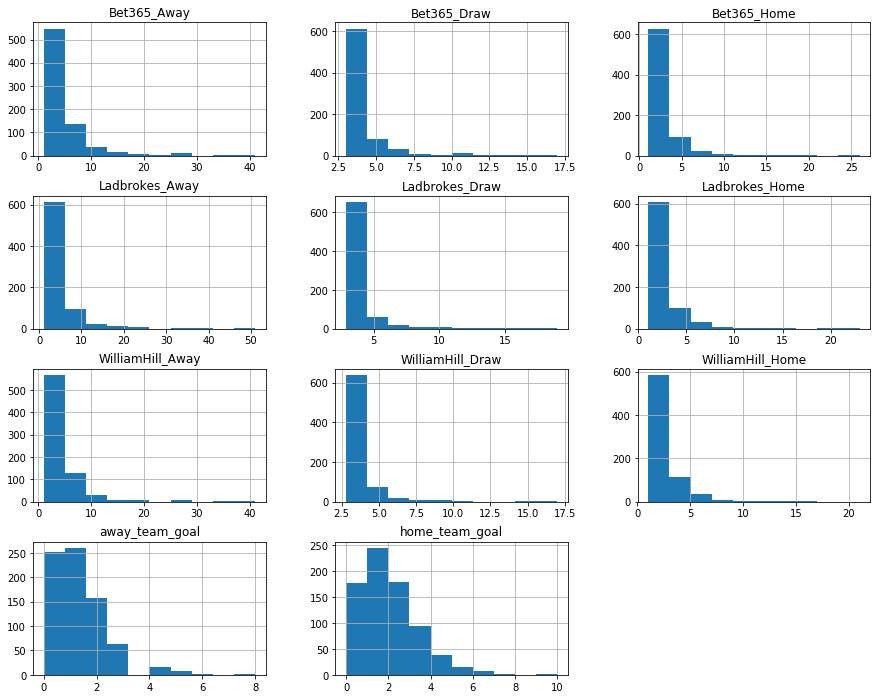

In [47]:
df.hist(figsize=(15,12)); #plotting some histograms to get some first impressions

This visual representation is really helpful in seeing if there are any obvious errors and getting an idea of what you may find in your analysis. For example if there was a huge amount of games which had 10 goals, or a large amount of games with betting odds at 20 it would be a call to do some analysis to clean the data before we preceded. Looking at the above, the data looks sensible.

> There isnt much we didnt already know here, e.g. goals are skewed to right towards one, although we can see that there are more zero values for goals for away teams. We can also see that the home odds (right charts) are maybe slightly more skewed to the right when compared to away odds - this may show us the bookies are doing a good job, as we saw earlier that the mean amount of goals for the home team is above that of the away team.

> To confirm out suspicion about goals and betting for home teams vs away teams, lets plot some more charts. For the betting odds we will just use Bet365.

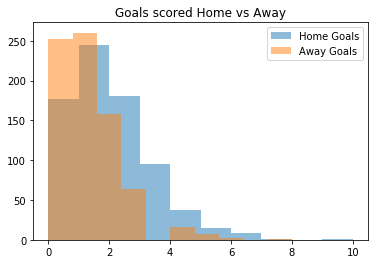

In [48]:
plt.hist(df.home_team_goal, alpha=0.5, label='Home Goals')
plt.hist(df.away_team_goal, alpha=0.5, label='Away Goals')
plt.legend(loc='upper right')
plt.title('Goals scored Home vs Away');

This graph makes it clear to us that the away goals are more skewed towards 0-2, whilst we can actually see clearly that there are actually more instances where the home teams scores one goal, than the home team not scoring at all. This is also true for the away team, but by a much smaller margin.

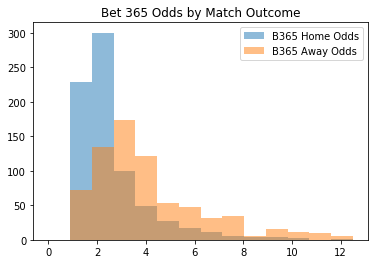

In [49]:
bins = np.linspace(0, 12.5, 15)

plt.hist(df.Bet365_Home, bins, alpha=0.5, label='B365 Home Odds')
plt.hist(df.Bet365_Away, bins, alpha=0.5, label='B365 Away Odds')
plt.legend(loc='upper right')
plt.title('Bet 365 Odds by Match Outcome');

This histogram has been manipulated and cuts out any odds that are over 12.5 - this makes the graph more concise and clear. We have also not shown the odds for a draw so the graph is comparable to that of the above. 

We can see that Home odds are more skewed to the right and are concentrated around 1 to 2, whilst the odds for an Away win are more spread out and peak at around 3. This shows us that bookmakers believe that a home win is more likely and therefore want to limit what they want to pay out by offering lower odds.

### Data Cleaning - Adding Columns
> As the data I have is already quite clean thanks to the SQL used earlier, and the checks we have performaed above - I will use this section to add some columns that may give us some more insights in the exploratory phase.

In [50]:
df['total_goals'] = df['home_team_goal'] + df['away_team_goal']
# creating a total goals column as this may be useful later on

In [51]:
df.tail() #just to check that this has been added

,country_name,league_name,season,home_team_goal,away_team_goal,Bet365_Home,Bet365_Draw,Bet365_Away,Ladbrokes_Home,Ladbrokes_Draw,Ladbrokes_Away,WilliamHill_Home,WilliamHill_Draw,WilliamHill_Away,home_team,away_team,total_goals
755,Spain,Spain LIGA BBVA,2015/2016,2,1,1.57,3.80,6.50,1.57,3.75,6.50,1.62,3.3,7.0,Atlético Madrid,Valencia CF,3
756,Spain,Spain LIGA BBVA,2015/2016,2,0,2.25,3.25,3.40,2.25,3.20,3.25,2.38,3.1,3.1,Málaga CF,RC Deportivo de La Coruña,2
757,Spain,Spain LIGA BBVA,2015/2016,3,0,1.53,4.00,7.00,1.50,4.00,6.50,1.57,3.5,7.0,Athletic Club de Bilbao,Real Sporting de Gijón,3
758,Spain,Spain LIGA BBVA,2015/2016,1,1,2.30,3.25,3.25,2.30,3.20,3.10,2.40,3.1,3.1,Granada CF,Real Betis Balompié,2
759,Spain,Spain LIGA BBVA,2015/2016,3,0,2.20,3.40,3.20,2.10,3.40,3.30,2.20,3.4,3.2,Rayo Vallecano,RCD Espanyol,3


In [52]:
conditions = [
    (df['home_team_goal'] == df['away_team_goal']),
    (df['home_team_goal'] > df['away_team_goal']),
    (df['home_team_goal'] < df['away_team_goal'])]
choices = ['D', 'H', 'A']
df['result'] = np.select(conditions, choices) 

#creates a new column that will give a letter to indicate result of match. H = Home team win, A = Away team win, D = Draw

In [53]:
df.head() # check that this has added succesfully

,country_name,league_name,season,home_team_goal,away_team_goal,Bet365_Home,Bet365_Draw,Bet365_Away,Ladbrokes_Home,Ladbrokes_Draw,Ladbrokes_Away,WilliamHill_Home,WilliamHill_Draw,WilliamHill_Away,home_team,away_team,total_goals,result
0,England,England Premier League,2015/2016,0,2,1.29,6.0,12.00,1.29,5.5,12.0,1.30,5.0,11.0,Arsenal,West Ham United,2,A
1,England,England Premier League,2015/2016,0,1,2.00,3.6,4.00,2.05,3.3,4.0,1.91,3.5,4.0,Bournemouth,Aston Villa,1,A
2,England,England Premier League,2015/2016,2,2,1.36,5.0,11.00,1.40,4.5,10.0,1.40,4.0,10.0,Chelsea,Swansea City,4,D
3,England,England Premier League,2015/2016,2,2,1.70,3.9,5.50,1.75,3.8,5.0,1.73,3.5,5.0,Everton,Watford,4,D
4,England,England Premier League,2015/2016,4,2,1.95,3.5,4.33,2.00,3.4,4.2,2.00,3.1,2.7,Leicester City,Sunderland,6,H


In [152]:
df.total_goals.sum()

2069

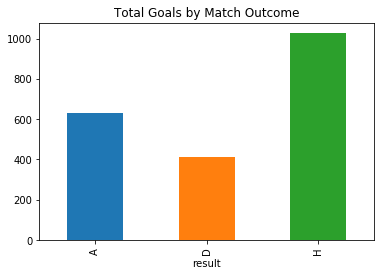

In [157]:
df.groupby('result')['total_goals'].sum().plot.bar(title='Total Goals by Match Outcome');

The graph above shows us the total amount of goals per match outcome. We can see that draws had the least amount of goals, whilst wins for the side at home had by far the most amount of goals here. This would suggest to us that the home side is likely to score the most amount of goals.

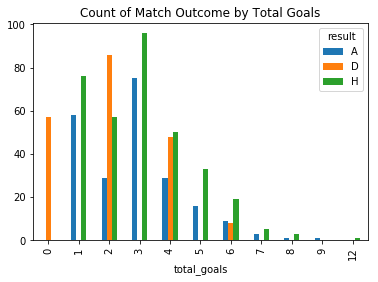

In [155]:
df.groupby('result').total_goals.value_counts().unstack(0).plot.bar(title='Count of Match Outcome by Total Goals');

This graph shows us a count of matches and how many goals they had by result. We can see that obviously goals with no goals are all draws, and that the most common is a home draw with 3 goals in it.

### Initial Analysis & Enhanced Data Preperation
> Now we have added some columns to the report, I want to make some masks so that we can quickly perform analysis to answer the questions that we pose. I also want to do some quick initial analysis to help us get a rough idea of what the data is showing - this will help us tailor our questions and make some first impressions.

In [55]:
result_hw = df.result == 'H' # mask for home win
result_aw = df.result == 'A' # mask for away win
result_d = df.result == 'D' # mask for draw

In [56]:
hw_prc = df.result[result_hw].count() / len(df) # getting a percentage of games that the home team has won
aw_prc = df.result[result_aw].count() / len(df) # getting a percentage of games that the away team has won 
d_prc = df.result[result_d].count() / len(df) # getting a percentage of games that are drawn 

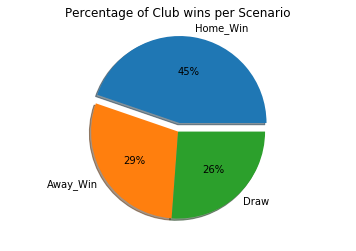

In [57]:
# this will plot a pie chart for us
labels = 'Home_Win', 'Away_Win', 'Draw'
fracs = [hw_prc, aw_prc, d_prc]
explode = (0.1,0,0)
plt.axis("equal")
plt.title('Percentage of Club wins per Scenario')
plt.pie(fracs, explode=explode, labels=labels, autopct='%.0f%%', shadow=True);

As expected here, we can see that 45% of the time the home side is winning the matches. We can also see that a draw is the most unlikely to occur.

In [58]:
league_pl = df.league_name == 'England Premier League' #mask to filter English teams
league_bbva = df.league_name == 'Spain LIGA BBVA' #mask to filter Spanish teams

In [59]:
df['home_bet_average'] = (df['Bet365_Home'] + df['Ladbrokes_Home'] + df['WilliamHill_Home']) / 3
df['away_bet_average'] = (df['Bet365_Away'] + df['Ladbrokes_Away'] + df['WilliamHill_Away']) / 3
df['draw_bet_average'] = (df['Bet365_Draw'] + df['Ladbrokes_Draw'] + df['WilliamHill_Draw']) / 3

We have created some columns showing us the average of the odds for each match, for each outcome.

In [60]:
# this will give us a value which shows the average 
home_av_odds = df.home_bet_average.sum() / len(df)
away_av_odds = df.away_bet_average.sum() / len(df)
draw_av_odds = df.draw_bet_average.sum() / len(df)

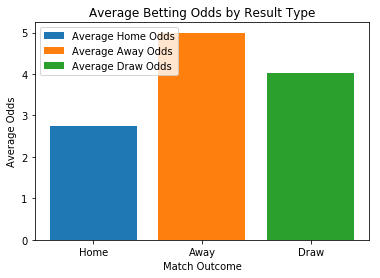

In [61]:
# pltting a bar chart to see the average odds for each scenario
plt.bar('Home', home_av_odds, label='Average Home Odds')
plt.bar('Away', away_av_odds, label='Average Away Odds')
plt.bar('Draw', draw_av_odds, label='Average Draw Odds')

plt.xlabel('Match Outcome')
plt.ylabel('Average Odds')
plt.title('Average Betting Odds by Result Type')
plt.legend();

We can  see the average odds for home games are far lower than the odds for away games and draws. This is interesting as it shows that even though a draw it the most unlikely scenario, the longest odds come from that of an away win.

These two charts help tell a story of predictions (betting odds) and results.

<a id='eda'></a>
## Exploratory Data Analysis

> We have now cleaned the data, added some columns and also created some masks. In addition to this we have also performed some basic visual analysis to understand the data we are looking at. 

### Research Question 1 - Do certain bookmakers give better odds than others consistently?

What we want to do first it to try and understand how many times that certain bookmakers have odds that are the highest out of the three bookmakers for which we have data - this will help us get an idea of which bookmaker we would want to be using based upon the outcome we believe will occur.

In [62]:
# Looks for when the highest odds of a team at home equal what the Bet365 are giving 
b365H_max = df[["Bet365_Home", "Ladbrokes_Home", "WilliamHill_Home"]].max(axis=1) == df.Bet365_Home
b365H_max_count = np.count_nonzero(b365H_max)

# Looks for when the highest odds of a team at home equal what the Ladbrokes are giving 
ladbrokesH_max = df[["Bet365_Home", "Ladbrokes_Home", "WilliamHill_Home"]].max(axis=1) == df.Ladbrokes_Home
ladbrokesH_max_count = np.count_nonzero(ladbrokesH_max)

# Looks for when the highest odds of a team at home equal what the Willliam Hill are giving 
williamhillH_max = df[["Bet365_Home", "Ladbrokes_Home", "WilliamHill_Home"]].max(axis=1) == df.WilliamHill_Home
williamhillH_max_count = np.count_nonzero(williamhillH_max)


print(b365H_max_count)
print(ladbrokesH_max_count)
print(williamhillH_max_count) #here we are just checking that the results are sensible

431
259
518


We can see that above the values do not total our amount of rows, 760. This indicates that in some rows two bookmakers offer the same odds. This is to be expected as it is common for odds to be close to each other in games with only three scenarios, such as football.

We will look to still plot the information above into a pie chart, using the total of all three values the denominator to derive the relevant percentages. This will still show us who is consistantly offering better odds in the football matches.

First of all lets repeat this for the Away games, and Draws. This will let us see if the top bookmaker is the same across all scenarios.

#### This is for the outcome of an away win

In [63]:
# Looks for when the highest odds of a team playing away equal what the Bet365 are giving 
b365A_max = df[["Bet365_Away", "Ladbrokes_Away", "WilliamHill_Away"]].max(axis=1) == df.Bet365_Away
b365A_max_count = np.count_nonzero(b365A_max)

# Looks for when the highest odds of a team  playing away equal what the Ladbrokes are giving 
ladbrokesA_max = df[["Bet365_Away", "Ladbrokes_Away", "WilliamHill_Away"]].max(axis=1) == df.Ladbrokes_Away
ladbrokesA_max_count = np.count_nonzero(ladbrokesA_max)

# Looks for when the highest odds of a team  playing away equal what the Willliam Hill are giving 
williamhillA_max = df[["Bet365_Away", "Ladbrokes_Away", "WilliamHill_Away"]].max(axis=1) == df.WilliamHill_Away
williamhillA_max_count = np.count_nonzero(williamhillA_max)


print(b365A_max_count)
print(ladbrokesA_max_count)
print(williamhillA_max_count)

504
279
383


#### This is for the outcome of a draw

In [64]:
# Looks for when the highest odds of a team playing away equal what the Bet365 are giving 
b365D_max = df[["Bet365_Draw", "Ladbrokes_Draw", "WilliamHill_Draw"]].max(axis=1) == df.Bet365_Draw
b365D_max_count = np.count_nonzero(b365D_max)

# Looks for when the highest odds of a team  playing away equal what the Ladbrokes are giving 
ladbrokesD_max = df[["Bet365_Draw", "Ladbrokes_Draw", "WilliamHill_Draw"]].max(axis=1) == df.Ladbrokes_Draw
ladbrokesD_max_count = np.count_nonzero(ladbrokesD_max)

# Looks for when the highest odds of a team  playing away equal what the Willliam Hill are giving 
williamhillD_max = df[["Bet365_Draw", "Ladbrokes_Draw", "WilliamHill_Draw"]].max(axis=1) == df.WilliamHill_Draw
williamhillD_max_count = np.count_nonzero(williamhillD_max)


print(b365D_max_count)
print(ladbrokesD_max_count)
print(williamhillD_max_count)

664
248
99


To make these visualisations a bit clearer - lets make some pie charts!

In [65]:
home_win_odds_count = b365H_max_count + ladbrokesH_max_count + williamhillH_max_count #total count of odds values for home
away_win_odds_count = b365A_max_count + ladbrokesA_max_count + williamhillA_max_count #total count of odds values for away
draw_odds_count = b365D_max_count + ladbrokesD_max_count + williamhillD_max_count #total count of odds values for a draw

b365H_prc = b365H_max_count / home_win_odds_count #getting percentage of Bet 365 Home Wins against the total
ladbrokesH_prc = ladbrokesH_max_count / home_win_odds_count #getting percentage of Ladbrokes Home Wins against the total
williamhillH_prc = williamhillH_max_count / home_win_odds_count #getting percentage of William Hill Home Wins against the total

b365A_prc = b365A_max_count / away_win_odds_count #getting percentage of Bet 365 Away Wins against the total
ladbrokesA_prc = ladbrokesA_max_count / away_win_odds_count #getting percentage of Ladbrokes Away Wins against the total
williamhillA_prc = williamhillA_max_count / away_win_odds_count #getting percentage of William Hill Away Wins against the total

b365D_prc = b365D_max_count / draw_odds_count #getting percentage of Bet 365 Draws against the total
ladbrokesD_prc = ladbrokesD_max_count / draw_odds_count #getting percentage of Ladbrokes Draws against the total
williamhillD_prc = williamhillD_max_count / draw_odds_count #getting percentage of William Hill Draws against the total


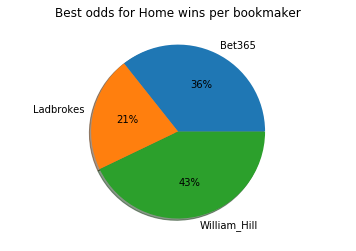

In [66]:
labels = 'Bet365', 'Ladbrokes', 'William_Hill'
fracs = [b365H_prc, ladbrokesH_prc, williamhillH_prc]
explode = (0,0,0)
plt.axis("equal")
plt.title('Best odds for Home wins per bookmaker')
plt.pie(fracs, explode=explode, labels=labels, autopct='%.0f%%', shadow=True);

This pie chart has been analysed in the comments down below.

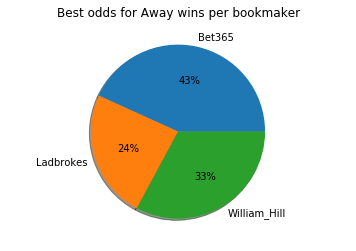

In [67]:
labels = 'Bet365', 'Ladbrokes', 'William_Hill'
fracs = [b365A_prc, ladbrokesA_prc, williamhillA_prc]
explode = (0,0,0)
plt.axis("equal")
plt.title('Best odds for Away wins per bookmaker')
plt.pie(fracs, explode=explode, labels=labels, autopct='%.0f%%', shadow=True);

This pie chart has been analysed in the comments down below.

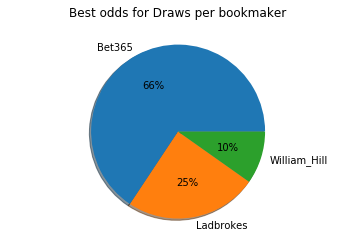

In [68]:
labels = 'Bet365', 'Ladbrokes', 'William_Hill'
fracs = [b365D_prc, ladbrokesD_prc, williamhillD_prc]
explode = (0,0,0)
plt.axis("equal")
plt.title('Best odds for Draws per bookmaker')
plt.pie(fracs, explode=explode, labels=labels, autopct='%.0f%%', shadow=True);

From the charts above we can see that the choosing a bookermaker which has the best odds is different for each possible scenario. Bet365 typically gives the best (or odds equal with the best) odds for Draws and Away wins, and William Hill typically gives the best odds for home wins.

To summarise, it seems that if you want the best odds, it depends on what outcome you are going for!

### Research Question 2 - Are there certain teams that may defy bookmakers consistently?

Here we are looking to see if there are certain teams that defy the bookmakers.

We will define 'beating the bookmakers' as a final outcome happening which has the longest odds (highest number). Becuase Bet 365 seems to have either the best odds, or close to the best, we will just look at their odds.

In [69]:
# this will create a column that gives us the column name which contains the longest odds
df['longest_odds'] = df[["Bet365_Home", "Bet365_Away", "Bet365_Draw"]].idxmax(axis=1)

In [70]:
# This will remove everything before the underscore e.g the Bet365 prefix
df.longest_odds = df.longest_odds.str.split('_').str[1]

In [71]:
# This only takes the letter of the column, meaning we can compare directly with the 'result' column
df.longest_odds = df.longest_odds.str[0]

In [72]:
# I will check that this works
df.head()

,country_name,league_name,season,home_team_goal,away_team_goal,Bet365_Home,Bet365_Draw,Bet365_Away,Ladbrokes_Home,Ladbrokes_Draw,...,WilliamHill_Draw,WilliamHill_Away,home_team,away_team,total_goals,result,home_bet_average,away_bet_average,draw_bet_average,longest_odds
0,England,England Premier League,2015/2016,0,2,1.29,6.0,12.00,1.29,5.5,...,5.0,11.0,Arsenal,West Ham United,2,A,1.293333,11.666667,5.500000,A
1,England,England Premier League,2015/2016,0,1,2.00,3.6,4.00,2.05,3.3,...,3.5,4.0,Bournemouth,Aston Villa,1,A,1.986667,4.000000,3.466667,A
2,England,England Premier League,2015/2016,2,2,1.36,5.0,11.00,1.40,4.5,...,4.0,10.0,Chelsea,Swansea City,4,D,1.386667,10.333333,4.500000,A
3,England,England Premier League,2015/2016,2,2,1.70,3.9,5.50,1.75,3.8,...,3.5,5.0,Everton,Watford,4,D,1.726667,5.166667,3.733333,A
4,England,England Premier League,2015/2016,4,2,1.95,3.5,4.33,2.00,3.4,...,3.1,2.7,Leicester City,Sunderland,6,H,1.983333,3.743333,3.333333,A


In [73]:
df['beating_bookies_team'] = df.result == df.longest_odds 
#this will flag as true if the longest_odds and results columns match, showing us its applicable to get the team name

In [74]:
df.head()

,country_name,league_name,season,home_team_goal,away_team_goal,Bet365_Home,Bet365_Draw,Bet365_Away,Ladbrokes_Home,Ladbrokes_Draw,...,WilliamHill_Away,home_team,away_team,total_goals,result,home_bet_average,away_bet_average,draw_bet_average,longest_odds,beating_bookies_team
0,England,England Premier League,2015/2016,0,2,1.29,6.0,12.00,1.29,5.5,...,11.0,Arsenal,West Ham United,2,A,1.293333,11.666667,5.500000,A,True
1,England,England Premier League,2015/2016,0,1,2.00,3.6,4.00,2.05,3.3,...,4.0,Bournemouth,Aston Villa,1,A,1.986667,4.000000,3.466667,A,True
2,England,England Premier League,2015/2016,2,2,1.36,5.0,11.00,1.40,4.5,...,10.0,Chelsea,Swansea City,4,D,1.386667,10.333333,4.500000,A,False
3,England,England Premier League,2015/2016,2,2,1.70,3.9,5.50,1.75,3.8,...,5.0,Everton,Watford,4,D,1.726667,5.166667,3.733333,A,False
4,England,England Premier League,2015/2016,4,2,1.95,3.5,4.33,2.00,3.4,...,2.7,Leicester City,Sunderland,6,H,1.983333,3.743333,3.333333,A,False


In [94]:
df['beating_bookies_team'] = np.where( ( (df['longest_odds'] == 'A') & (df['beating_bookies_team'] == True ) ) , df.away_team, df.beating_bookies_team)
df['beating_bookies_team'] = np.where( ( (df['longest_odds'] == 'H') & (df['beating_bookies_team'] == True ) ) , df.home_team, df.beating_bookies_team)
df['beating_bookies_team'] = np.where( ( (df['longest_odds'] == 'D') & (df['beating_bookies_team'] == True ) ) , 'Draw', df.beating_bookies_team)


#This code will look at the 'beating_bookies_team' column above, and reassign the value
#if the Away team had the longest odds it will change to the Away team name
#if the Home team had the longest odds it will change to teh Home team
#if a Draw had the longest odds it will change to read 'Draw'
#if the 'longest_odds' did not match 'result', it wll read the boolean "False"

In [76]:
df.tail(100) #checking that this works - using 100 rows to check all versions of the above

,country_name,league_name,season,home_team_goal,away_team_goal,Bet365_Home,Bet365_Draw,Bet365_Away,Ladbrokes_Home,Ladbrokes_Draw,...,WilliamHill_Away,home_team,away_team,total_goals,result,home_bet_average,away_bet_average,draw_bet_average,longest_odds,beating_bookies_team
660,Spain,Spain LIGA BBVA,2015/2016,2,3,8.50,5.50,1.33,7.00,5.25,...,1.30,Rayo Vallecano,Real Madrid CF,5,A,8.166667,1.330000,5.416667,H,False
661,Spain,Spain LIGA BBVA,2015/2016,0,0,1.73,3.75,5.00,1.75,3.60,...,4.50,Villarreal CF,Real Sociedad,0,D,1.776667,4.666667,3.583333,A,False
662,Spain,Spain LIGA BBVA,2015/2016,2,2,3.20,3.30,2.30,3.00,3.40,...,2.40,Getafe CF,Valencia CF,4,D,3.100000,2.333333,3.266667,D,Draw
663,Spain,Spain LIGA BBVA,2015/2016,1,1,2.25,3.20,3.40,2.15,3.30,...,3.20,SD Eibar,RC Deportivo de La Coruña,2,D,2.233333,3.300000,3.233333,A,False
664,Spain,Spain LIGA BBVA,2015/2016,6,0,1.04,17.00,34.00,1.05,15.00,...,41.00,FC Barcelona,Real Sporting de Gijón,6,H,1.046667,33.666667,16.333333,A,False
665,Spain,Spain LIGA BBVA,2015/2016,2,0,1.50,4.33,6.50,1.50,4.33,...,6.00,Sevilla FC,Real Betis Balompié,2,H,1.510000,6.083333,4.286667,A,False
666,Spain,Spain LIGA BBVA,2015/2016,4,0,2.25,3.30,3.30,2.20,3.30,...,3.30,UD Las Palmas,RCD Espanyol,4,H,2.216667,3.300000,3.300000,A,False
667,Spain,Spain LIGA BBVA,2015/2016,2,1,1.53,4.33,6.00,1.55,4.00,...,6.00,RC Celta de Vigo,Granada CF,3,H,1.550000,6.000000,4.043333,A,False
668,Spain,Spain LIGA BBVA,2015/2016,2,2,3.40,3.20,2.25,3.30,3.25,...,2.25,Levante UD,Athletic Club de Bilbao,4,D,3.300000,2.233333,3.250000,H,False
669,Spain,Spain LIGA BBVA,2015/2016,1,0,1.33,5.00,11.00,1.35,4.50,...,11.00,Atlético Madrid,Málaga CF,1,H,1.336667,10.666667,4.666667,A,False


In [134]:
df['beating_bookies_team'].value_counts()

False                        582
Draw                          63
West Ham United               10
Stoke City                     8
West Bromwich Albion           6
Real Sociedad                  5
Real Betis Balompié            5
Granada CF                     5
Swansea City                   5
Southampton                    4
Real Sporting de Gijón         4
Watford                        4
UD Las Palmas                  4
RCD Espanyol                   4
Sunderland                     3
SD Eibar                       3
RC Celta de Vigo               3
Valencia CF                    3
Newcastle United               3
Crystal Palace                 3
RC Deportivo de La Coruña      3
Levante UD                     3
Leicester City                 2
Bournemouth                    2
Getafe CF                      2
Liverpool                      2
Villarreal CF                  2
Athletic Club de Bilbao        2
Manchester United              2
Everton                        2
Málaga CF 

The list above gives a full breakdown of the teams that have 'beat the bookies'. It shows us that West Ham were the top, and the only team to beat the bookies in a double figure amount of games.

Lets plot some graphs to make this easier to digest.

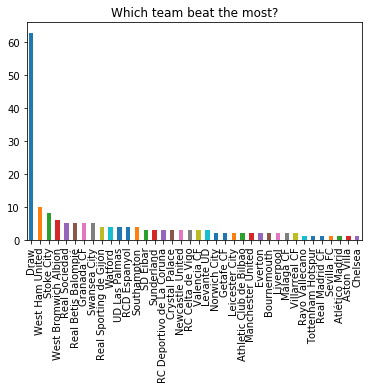

In [149]:
df2 = df[df.beating_bookies_team != False]
df2['beating_bookies_team'].value_counts().plot.bar(title='Which team beat the most?');

This removes all games where the bookmakers were not beaten, lets remove the draws too.

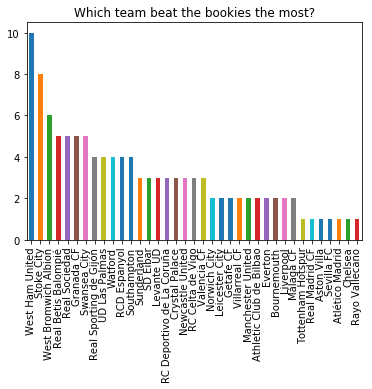

In [150]:
df3 = df2[df2.beating_bookies_team != 'Draw']
df3['beating_bookies_team'].value_counts().plot.bar(title='Which team beat the bookies the most?');

Here we go - this is much easier to see. We can see that West Ham were way out in front.

In [78]:
#the below will create a variable depending on a filter, then count how many values are in that variable
win_beat_count = len(df[(df['beating_bookies_team'] != 'Draw') & (df['beating_bookies_team'] != False)])
draw_beat_count = len(df[df['beating_bookies_team'] == 'Draw'])
not_beat_count = len(df[df['beating_bookies_team'] == False])

print(win_beat_count) #check we get an expected output
print(draw_beat_count) #check that we get an expected output, can compare to the data above
print(not_beat_count) #check that we get an expected output, can compare to the data above
print(win_beat_count + draw_beat_count + not_beat_count) #make sure they add up to the total, 760

115
63
582
760


In [79]:
#now we have checked them, lets make them into percentages
win_beat_prc = win_beat_count / len(df)
draw_beat_prc = draw_beat_count / len(df)
not_beat_prc = not_beat_count / len(df)

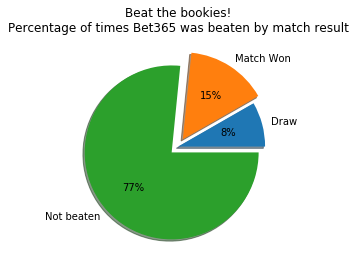

In [80]:
#creating a pie chart to easily see this data
labels = 'Draw', 'Match Won', 'Not beaten'
fracs = [draw_beat_prc, win_beat_prc, not_beat_prc]
explode = (0,0.1,0.1)
plt.axis("equal")
plt.title('Beat the bookies!\nPercentage of times Bet365 was beaten by match result')
plt.pie(fracs, explode=explode, labels=labels, autopct='%.0f%%', shadow=True);

As we can see, it is not all too often that the bookies are beaten. The above suggests that the bookmakers would keep 77% of the money behind all bets, and would only pay out on 23% of bets. If, however, you do want to put that money on - it looks like bookmakers are most often beaten by a team winning and not draws.

Let's deep dive into that winning percentage of 23% to see how the bets are split.

In [81]:
win_beat_count_home = len(df[(df['beating_bookies_team'] != 'Draw') & (df['beating_bookies_team'] != False) & (df['longest_odds'] == 'H')])
win_beat_count_away = len(df[(df['beating_bookies_team'] != 'Draw') & (df['beating_bookies_team'] != False) & (df['longest_odds'] == 'A')])
# the aboev will look at what how many times the games were won by away or home teams


print(win_beat_count_home)
print(win_beat_count_away) #just checking that these are sensible amounts

32
83


In [82]:
win_beat_home_prc = win_beat_count_home / (win_beat_count + draw_beat_count)
win_beat_away_prc = win_beat_count_away / (win_beat_count + draw_beat_count)
draw_beat_prc_win = draw_beat_count / (win_beat_count + draw_beat_count)
#these are to get some percentage amounts for a pie chart

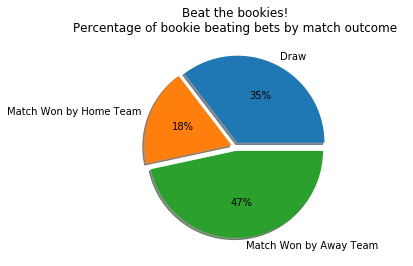

In [83]:
#creating a pie chart to easily see the breakdown of bookie beating scenarios
labels = 'Draw', 'Match Won by Home Team', 'Match Won by Away Team'
fracs = [draw_beat_prc_win, win_beat_home_prc, win_beat_away_prc]
explode = (0.05,0.05,0.05)
plt.axis("equal")
plt.title('Beat the bookies!\nPercentage of bookie beating bets by match outcome')
plt.pie(fracs, explode=explode, labels=labels, autopct='%.0f%%', shadow=True);

So, we can ascertain from the above that you are most likely to beat the bookies by betting on the away team to win. The above follows the analysis we saw right at the start, where the most likely result is a win to the home team - this is mirrored in the above, as it suggests that it is not often that the home team are underdogs and would present themselves as an opportunity to beat the bookies.

I want to do some analysis by league to finish this off, to see if it can give us any additional insights

In [84]:
pl_beat_teams = len(df.beating_bookies_team[league_pl].value_counts())-2 
#count of number of teams that have beaten bookies from PL, minus two to remove count of Draw and False
bbva_beat_teams = len(df.beating_bookies_team[league_bbva].value_counts())-2 
#count of number of teams that have beaten bookies from BBVA, minus two to remove count of Draw and False

In [85]:
pl_beat_teams_prc = pl_beat_teams / (pl_beat_teams + bbva_beat_teams) #getting some percentages for count of PL teams
bbva_beat_teams_prc = bbva_beat_teams / (pl_beat_teams + bbva_beat_teams) #getting some percentages for count of BBVA teams

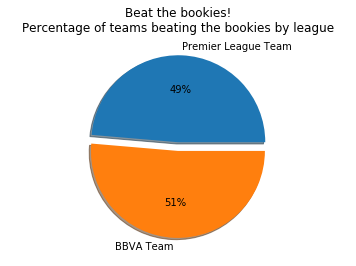

In [86]:
#creating a pie chart to easily see this data
labels = 'Premier League Team', 'BBVA Team'
fracs = [pl_beat_teams_prc, bbva_beat_teams_prc]
explode = (0.05,0.05)
plt.axis("equal")
plt.title('Beat the bookies!\nPercentage of teams beating the bookies by league')
plt.pie(fracs, explode=explode, labels=labels, autopct='%.0f%%', shadow=True);

In [87]:
pl_beats_count = len(df[(df['beating_bookies_team'] != 'Draw') & (df['beating_bookies_team'] != False) & (df['league_name'] == 'England Premier League')])
bbva_beats_count = len(df[(df['beating_bookies_team'] != 'Draw') & (df['beating_bookies_team'] != False) & (df['league_name'] == 'Spain LIGA BBVA')])
#creating a varibale to give us the total number of bookie beating matches that are associated with league

In [88]:
print(pl_beats_count)
print(bbva_beats_count)
print(pl_beats_count + bbva_beats_count) 
#testing that this data is correct

61
54
115


In [89]:
pl_beats_prc = pl_beats_count / win_beat_count #creating some percentages for a  graph
bbva_beats_prc = bbva_beats_count / win_beat_count #creating some percentages for a graph

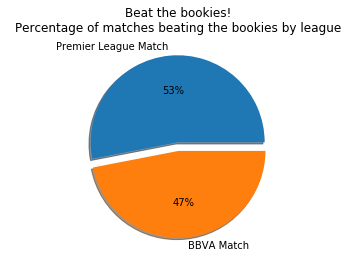

In [90]:
#creating a pie chart to easily see this data
labels = 'Premier League Match', 'BBVA Match'
fracs = [pl_beats_prc, bbva_beats_prc]
explode = (0.05,0.05)
plt.axis("equal")
plt.title('Beat the bookies!\nPercentage of matches beating the bookies by league')
plt.pie(fracs, explode=explode, labels=labels, autopct='%.0f%%', shadow=True);

We can see from these two pie charts that even though there are slightly more BBVA teams that have beat the bookies, if you look at amount of matches, the Premier League is on top - just.

<a id='conclusions'></a>
## Conclusions

In conclusion this analysis has helped us understand the best bookmakers to use depending on the outcome we are expecting and also which scenarios would most consistently give the longest odds. 

It was interesting to see that even though a draw is the most unlikely scenario - it was an away win that gave the longest odds on average.

If we look at the league data there were just about more teams in the Spanish league (BBVA) that did beat the bookies, there were more games in the premier league in which the longest odds paid out. This may suggest slightly more volatility in the Spanish league, with more underdog teams winning, whilst the data suggesting that a smaller amount of underdog premier league teams caused upsets. West Ham for example, who beat the bookies the most, came 7th out of 20 teams. I would argue that this is far above where they were expected to place before the start of the season.

Using this data, I would look to use William Hill is I was betting on a home team to win and Bet 365 for a draw or an away win. I would also turn to the Spanish league if I wanted to put on more varied bets on smaller teams causing an upset, whilst in the premier league I would maybe want to spend more time studying smaller teams which could beat the favourite.

If I were to continue this analysis I would look at the betting odds trends between leagues to understand if the bookmakers who gave the best odds overall consistently did between leagues or if there were differences between the two.

In regards to limitations, I would say that I would like to have carried out some predictive modelling using regression or something similar but I do not yet have the knowledge. If I had more time this is something I would have tried to research so that I could have implemented it. I would also say that it would have been good to have details on domestic cup competitions within the data set as this meant we could have perhaps analysed how a team was given odds in the league vs. domestic cups even if they played the same teams. 